# Test 10: t-test for two population means (method of paired comparisons)

## Objective

- To investigate the significance of the difference between two population means, $\mu_1$ and $\mu_2$. 
- No assumption is made about the population variances.

## Assumptions

- The observations for the two samples must be obtained in pairs. Apart from population differences, the observations in each pair should be carried out under identical, or almost identical, conditions.
- The test is accurate if the populations are normally distributed. 
    - If not normal, the test may be regarded as approximate

## Method

- The test statistic is computed based on the difference $d$ between random samples from both samples
    - $d$ should be computed from **paired samples**; that is, samples obtained in pairs, under identical conditions, from different populations
        - e.g. to compare the population of 2 species of migratory birds, you should count the number you see on the same day,

- Let the means of the samples from either population be $\bar{x_1}$ and $\bar{x_2}$

- Let's suppose we get $n$ such pairs of paired samples. Then we can compute the variance of the differences by taking
$$\begin{aligned}
    s^2 &= \sum_{i=1}^{n} \frac{(d_i - \bar{d})^2}{n-1}
\end{aligned}$$

- Then, the test statistic is:

$$
    t = \frac{\bar{x_1} - \bar{x_2}}{\frac{s}{\sqrt{n}}}
$$

- And the degree of freedom is simply $n-1$

## Example

- Problem
    - We want to compare the efficacy of two treatments for a respiratory condition
    - Choose sample of $n=10$ people to administer both treatments (at different times), to ensure that the physiological differences are minimised
        - In this case, the effect $d$ is computed at the person level
    - The patients then perform a treadmill exercise and until some maximum exercise rate is reached, and the times are compared.

- Question
    - Do these two treatments differ? (Two tail)
    - Is treatment one better than treatment 2? (One tail)

In [2]:
xbar1 = 1.1
xbar2 = 1.2
n=10
degrees_of_freedom=n-1
dbar = xbar1 - xbar2
s = 2.9

def compute_critical_value(xbar1, xbar2, s, n):
    return (xbar1 - xbar2) / (s/(n**0.5))

print(f'{degrees_of_freedom=}')
compute_critical_value(xbar1, xbar2, s, n)

degrees_of_freedom=9


-0.10904405724718537

## Proof by simulation that test statistic is t-distribution

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Assume equal mean and variance under null hypothesis
POPULATION_MEAN = 5
UNKNOWN_POPULATION_SIGMA_1 = 2
UNKNOWN_POPULATION_SIGMA_2 = 3
SAMPLE_SIZE = 100

def compute_test_statistic():
    sample_1 = np.random.normal(POPULATION_MEAN, UNKNOWN_POPULATION_SIGMA_1, SAMPLE_SIZE)
    sample_2 = np.random.normal(POPULATION_MEAN, UNKNOWN_POPULATION_SIGMA_2, SAMPLE_SIZE)
    diffs = sample_1 - sample_2
    sample_mean = np.mean(diffs)
    sample_variance = np.sum((diffs - sample_mean)**2)/(SAMPLE_SIZE-1)

    test_statistic = (np.mean(sample_1) - np.mean(sample_2)) / ((sample_variance/SAMPLE_SIZE)**0.5)
    return test_statistic

-0.0003517991760867176
1.0282076900788666


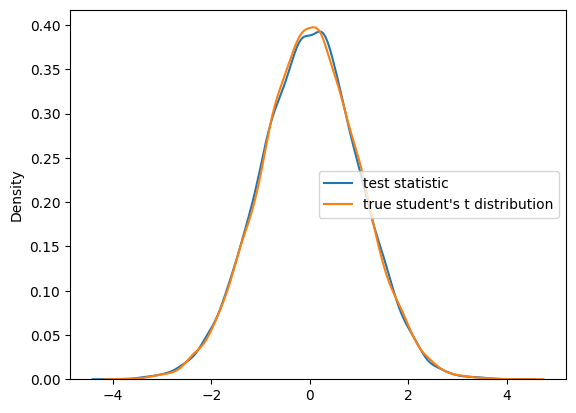

In [23]:
test_statistic_distribution = np.array([
    compute_test_statistic() for _ in range(20_000)
])

degrees_of_freedom = SAMPLE_SIZE - 1
true_students_t_distribution = np.random.standard_t(degrees_of_freedom, 20_000)

print(test_statistic_distribution.mean())
print(test_statistic_distribution.var())
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_students_t_distribution, label="true student's t distribution")
plt.legend()